In [22]:
%matplotlib inline
import os
import numpy as np
import fnmatch
import skimage
from skimage import data, io, filters, color, img_as_float
import matplotlib.pyplot as plt
from scipy import signal

images = []
path_base = '/Volumes/Zweiter/VVR/FL'

In [23]:
for file in os.listdir(path_base):
    if fnmatch.fnmatch(file, '*.jpg'):
        images.append(file)

In [117]:
this_image = skimage.data.imread(os.path.join(path_base,images[31]))

# fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 6), sharex=True, sharey=True)
# ax1.imshow(this_image)

In [118]:
image_lab = skimage.color.rgb2lab(this_image)
image_l = skimage.color.rgb2gray(image_lab[:,:,0])
image_a = skimage.color.rgb2gray(image_lab[:,:,1])

image_b = skimage.color.rgb2gray(image_lab[:,:,2])

# fig, ax = plt.subplots()
# # ax.imshow(image_l)
# # ax.imshow(image_a)
# ax.imshow(image_b)

In [119]:
img_h = image_b.shape[0]
img_w = image_b.shape[1]

h_3rd = int(np.floor(img_h/3))
w_3rd = int(np.floor(img_w/3))

middle_wide = image_b[w_3rd:2*w_3rd,:]
middle_tall = image_b[:,h_3rd:2*h_3rd]

# print image_b.shape
# print middle_wide.shape
# print middle_tall.shape

In [120]:
x_sums = np.sum(middle_wide, axis=0)
y_sums = np.sum(middle_tall, axis=1)

In [121]:
print(x_sums.shape, y_sums.shape)
print(x_sums.shape[0]/100)

(1536,) (883,)
15.36


17


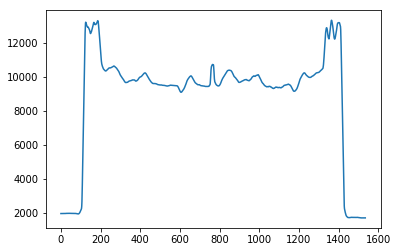

In [122]:
def round_up_to_odd(f):
    f = int(np.ceil(f))
    return f + 1 if f % 2 == 0 else f

window_length = round_up_to_odd(x_sums.shape[0] / 100)
print(window_length)
x_filtered = signal.savgol_filter(x_sums, window_length, 0)

# plt.plot(x_sums)
plt.plot(x_filtered)
# plt.plot(y_sums)

threshold is 13456.0173542
(array([ 111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  157,  158,  159,  160,
        161,  162,  163,  164,  165,  166,  167,  168,  169,  180,  181,
        182,  183,  184,  185,  186,  187,  188,  192, 1336, 1337, 1338,
       1339, 1340, 1341, 1342, 1343, 1362, 1363, 1364, 1365, 1366, 1367,
       1368, 1369, 1370, 1371, 1372, 1373, 1387, 1388, 1389, 1390, 1391,
       1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402,
       1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413,
       1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423]),)


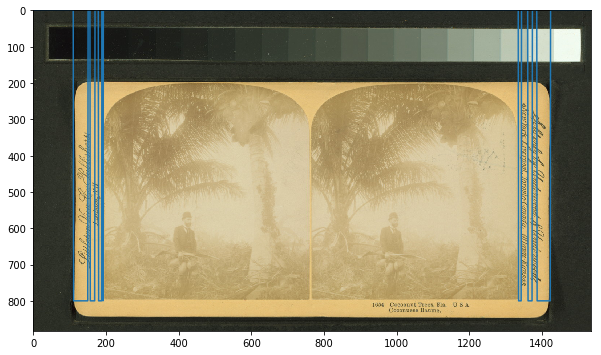

In [124]:
import scipy.signal.signaltools as sigtool

env = np.abs(sigtool.hilbert(x_sums))
threshold = np.mean(x_sums) * 1.5
print('threshold is', threshold)

square_sig = (env > threshold)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 6))
ax1.imshow(this_image)
ax1.plot(square_sig*800)

testing = np.nonzero(square_sig)
print(testing)

In [136]:
# Find Left and Right Edges of the Stereocard
left_part = x_sums[0:w_3rd]
left_max = np.argmax(left_part)

right_part = x_sums[2*w_3rd:-1]
right_max = np.argmax(right_part)
right_max = right_max + 2*w_3rd
# print left_max
# print right_max

In [137]:
# Find Top and Bottom Edges of the Stereocard
top_part = y_sums[0:h_3rd]
top_max = np.argmax(top_part)

bottom_part = y_sums[2*h_3rd:-1]
bottom_max = np.argmax(bottom_part)
bottom_max = bottom_max + 2 * h_3rd

print(top_max, bottom_max)

200 806


(606, 1218, 3)


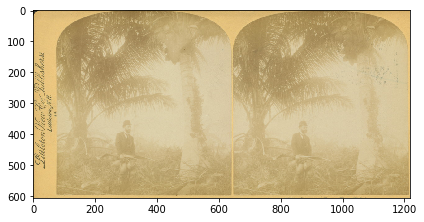

In [138]:
card = this_image[top_max:bottom_max,left_max:right_max]
print(card.shape)
io.imshow(card)
io.show()